# Imports

In [8]:
import os
import pandas as pd

from orbit_generation.experiment import read_json_to_dataframe, plot_corr_matrix, create_experiment_image_grid

# Imports

In [9]:
experiments_folder = r'../experiments'
experiments_file = r'../experiments/experiments.json'
results_folder = r'../experiments/results'
generated_orbits_path = os.path.join(results_folder, 'generated_orbits')
refined_orbits_path = os.path.join(results_folder, 'refined_orbits')
latent_space_with_distributions_path = os.path.join(results_folder, 'latent_space_label_distribution')
metrics_corr_matrix_path = os.path.join(results_folder, 'metrics_corr_matrix')

In [10]:
df=read_json_to_dataframe(experiments_file)

In [11]:
metrics_info = {
    'M1': 'loss',
    'M2': 'reconstruction_loss',
    'M3': 'kl_loss',
    'M4': 'label_ari',
    'M5': 'label_nmi',
    'M6': 'label_v-measure',
    'M7': 'label_purity',
    'M8': 'label_accuracy',
    'M9': 'position_error',
    'M10': 'velocity_error',
    'M11': ('position_error', 'velocity_error'),
    'M12': 'percentage_correct_order',
    'M13': 'percentage_convergence',
    'M14': 'average_iterations_convergence'
}

# Create a new DataFrame to display the ordered metrics
metrics_display = pd.DataFrame(index=df.index)

for metric_id, column_names in metrics_info.items():
    if isinstance(column_names, tuple):
        # Sum the specified columns if a tuple is provided (for combined metrics like M11)
        metrics_display[metric_id] = df[column_names[0]] + df[column_names[1]]
    else:
        # Directly map the column if it's a single metric
        metrics_display[metric_id] = df[column_names]

# Convert M12 from a percentage to a ratio
metrics_display['M12'] = metrics_display['M12'] / 100.0

# Optionally, rename the columns to more descriptive names as per your LaTeX table, mapping IDs to names
column_descriptions = {
    'M1': 'Loss (Total)',
    'M2': 'Reconstruction Loss',
    'M3': 'KL Loss',
    'M4': 'Label ARI',
    'M5': 'Label NMI',
    'M6': 'Label V-Measure',
    'M7': 'Label Purity',
    'M8': 'Label Accuracy',
    'M9': 'Average Position Error',
    'M10': 'Average Velocity Error',
    'M11': 'Average Error',
    'M12': 'Ratio of Correct Order',
    'M13': 'Ratio of Convergence',
    'M14': 'Average Convergence Iterations'
}

metrics_display.rename(columns=column_descriptions, inplace=True)

# Transpose the DataFrame
metrics_display = metrics_display.T

# Reset the index to start from 1 instead of 0 and rename it
metrics_display.columns = range(1, len(metrics_display.columns) + 1)
metrics_display.columns.name = 'Experiment'

# Calculate the average of each metric and add it as the last column
metrics_display['Average'] = metrics_display.mean(axis=1)

# Round all numbers in the DataFrame to three decimal places
metrics_display = metrics_display.round(3)

In [12]:
metrics_display

Experiment,1,2,3,4,5,6,Average
Loss (Total),15.873,13.936,12.388,8.628,9.240,9.826,11.648
Reconstruction Loss,8.832,4.927,4.154,2.840,2.578,2.852,4.364
KL Loss,7.041,9.009,8.234,5.788,6.661,6.975,7.285
Label ARI,0.434,0.634,0.591,0.471,0.574,0.644,0.558
Label NMI,0.773,0.852,0.839,0.784,0.843,0.864,0.826
Label V-Measure,0.773,0.852,0.839,0.784,0.843,0.864,0.826
Label Purity,0.626,0.716,0.718,0.626,0.711,0.753,0.692
Label Accuracy,0.552,0.673,0.679,0.565,0.661,0.714,0.641
Average Position Error,15.406,11.552,14.128,10.758,9.668,9.992,11.917
Average Velocity Error,24.868,20.366,23.214,21.630,22.154,24.079,22.719


Plot saved to ../experiments/results/metrics_corr_matrix


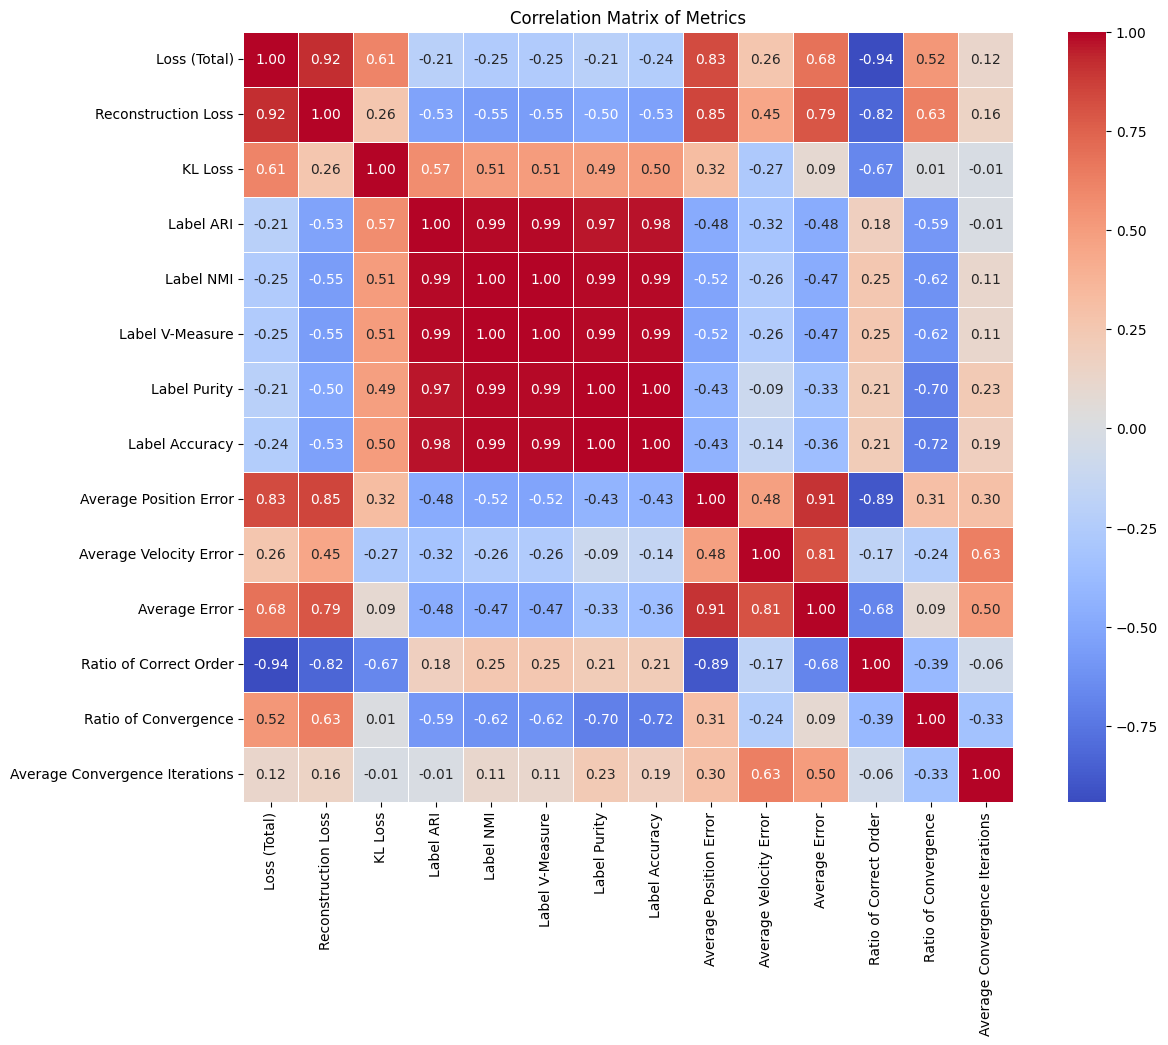

In [13]:
plot_corr_matrix(metrics_display.transpose(), save_path=metrics_corr_matrix_path)

# Plots

## Generated Orbits

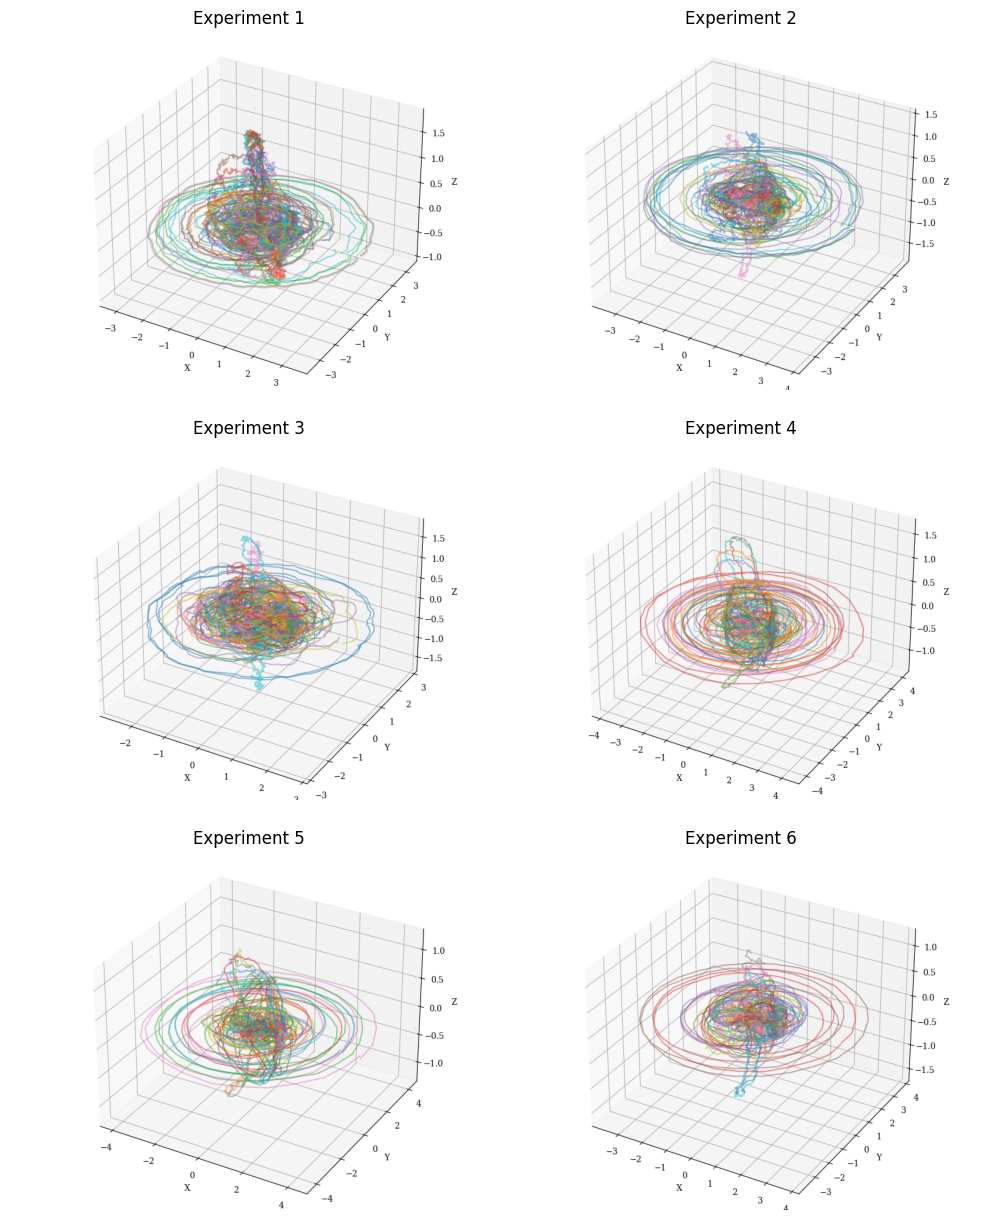

In [14]:
create_experiment_image_grid(experiments_folder, 'all_generated_data.png', font_size=100, crop_length=100, save_path=generated_orbits_path)

## Synthetic Orbits

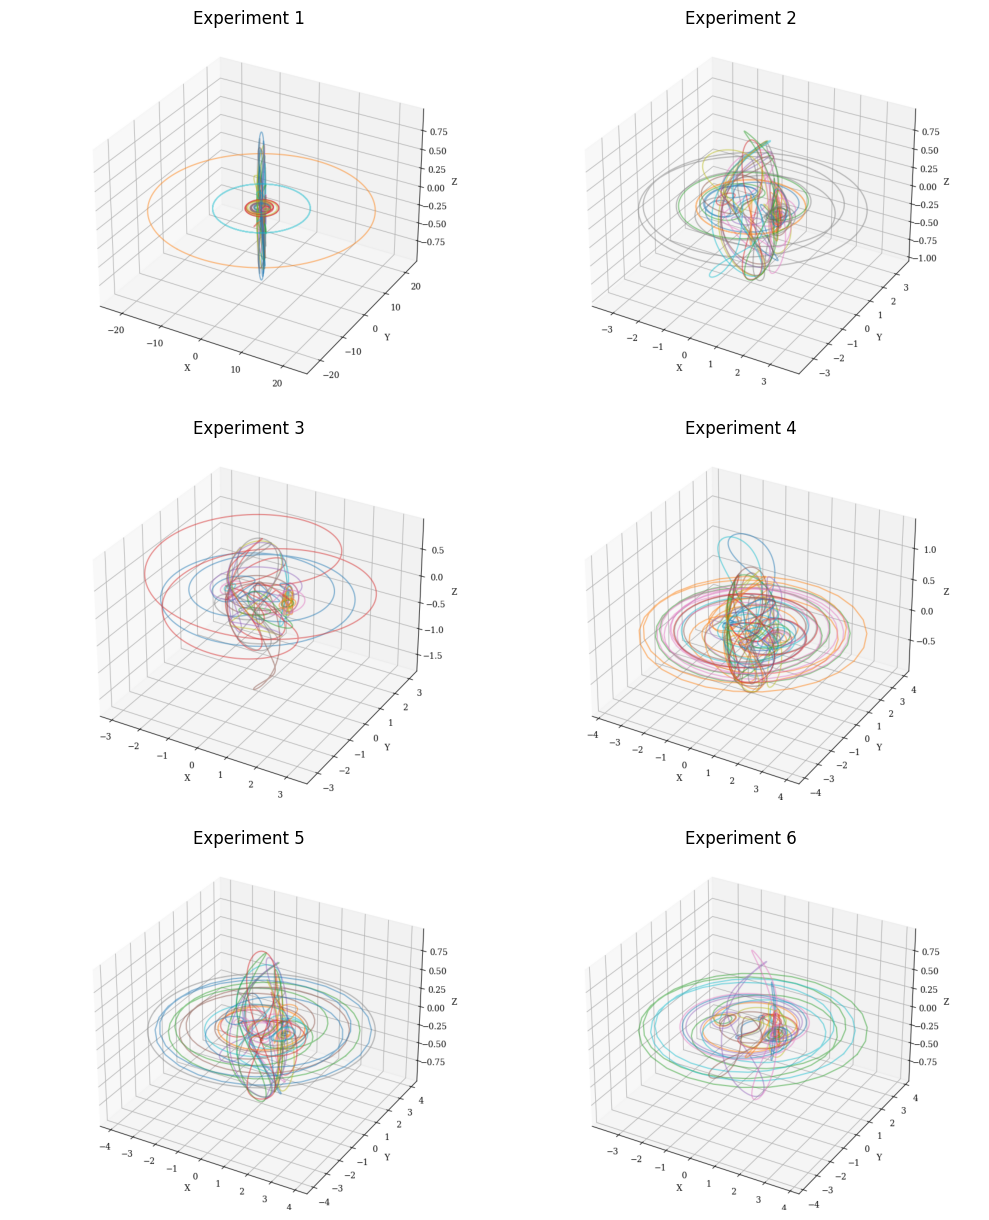

In [15]:
create_experiment_image_grid(experiments_folder, 'converged_orbits.png', font_size=100, crop_length=100, save_path=refined_orbits_path)